In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

import numpy as np
import pandas as pd

import cooler
import random

from imputation.imputation import *

In [225]:
resolution_rwr=100000
logscale=False
pad=1
std=1
rp=0.5 #restart probability to balance th information between global and local network structures
tol=0.01 #是什么意思
window_size=500000000
step_size=10000000
output_dist=500000000
min_cutoff=0
n_iters=20

window = 21

In [2]:
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [185]:
#随机选择n个样本 画图
def random_plot(n_sample,data_list,label_list):
    fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
    sample_index = random.sample(range(0, len(data_list)), n_sample)

    #画图
    fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
    for i in range(n_sample):
        ax[i//5,i%5].imshow(data_list[sample_index[i]],cmap=fruitpunch)
        ax[i//5,i%5].set_title("label:"+label_list[sample_index[i]])
    plt.show()

def heatmap_matrix(clr,matrix,chrom,title,break1=0,break2=0,window=21):
    fruitpunch = sns.blend_palette(['white', 'red'], as_cmap=True)
    fig,ax = plt.subplots(figsize=(10,10))
    im = ax.matshow(
        matrix,
        vmin=0,
        
        # extent=(0,100, clr.chromsizes[chrom], 0),
        cmap=fruitpunch)
    plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
    ax.set_title(title)
    # format_ticks(ax)
    plt.show()

## load data

In [392]:
#稀疏数据
#加载一个单细胞K562的数据看看

resolution = 100000

# K562_cooler_path = "/share/home/mliu/sc_sv/raw_data/scihic/K562/cooler/K562-ACCACCACGCCATTAA.mcool::resolutions/{}".format(resolution)
K562_cooler_path = "/share/home/mliu/sc_sv/raw_data/scihic/K562/cooler/K562-AGTACGCGCGTTACTT.mcool::resolutions/{}".format(resolution)


K562_sc_clr = cooler.Cooler(K562_cooler_path)

K562_bulk_cool_path = "/share/home/mliu/sc_sv/raw_data/K562/4DNFI18UHVRO.mcool::/resolutions/5000"
K562_bulk_clr = cooler.Cooler(K562_bulk_cool_path)

In [398]:
# chrom = "chr11"
# chrom = "chr22"
# chrom = "chr9"
# chrom = "chr6"
# chrom = "chr1"
# chrom = "chr13"
chrom = "chr18"
# sc_matrix = K562_sc_clr.matrix(balance=False).fetch(chrom)

# sc_matrix = imputation_rwr(K562_sc_clr,chrom,resolution_rwr,logscale,pad,std,rp,tol,window_size
#                     ,step_size,output_dist,min_cutoff,n_iters)

bulk_matrix = K562_bulk_clr.matrix(balance=False).fetch(chrom)

In [399]:
bin_table = K562_bulk_clr.bins().fetch(chrom)[:]
# bin_table = K562_sc_clr.bins().fetch(chrom)[:]
bin_table.index = range(len(bin_table)) #必须的

print(sc_matrix.shape)
print(bulk_matrix.shape)
print(bin_table.shape)

(781, 781)
(16075, 16075)
(16075, 7)


In [400]:
#chr11
# breakpoint1 = 5312156
# breakpoint2 = 5443877
#chr22
# breakpoint1 = 18965610
# breakpoint2 = 22592903
#chr9
# breakpoint1 = 120793531
# breakpoin2 = 129891596
#chr6
# breakpoin1 = 16774241
# breakpoin2 = 51870915

#chr1
# breakpoint = 186318948
# breakpoint2 = 187071977

#chr13
# breakpoint1 = 80513898
# breakpoint2 = 80895800

#chr18
breakpoint1 = 3478987
breakpoint2 = 10860074


bin1 = bin_table[(bin_table['chrom']==chrom) &(bin_table['start'] < breakpoint1 ) & (breakpoint1 < bin_table['end'] )]
bin2 = bin_table[(bin_table['chrom']==chrom) &(bin_table['start'] < breakpoint2 ) & (breakpoint2 < bin_table['end'] )]
print(bin1)
print(bin2)

x_c = bin1.index[0]#得到的是索引
y_c = bin2.index[0]
print(x_c,y_c)

     chrom    start      end  KR        VC   VC_SQRT    weight
695  chr18  3475000  3480000 NaN  6.793484  1.731184  0.009168
      chrom     start       end  KR        VC   VC_SQRT    weight
2172  chr18  10860000  10865000 NaN  2.613446  1.073751  0.020148
695 2172


In [402]:


x1 = x_c - int((window-1)/2)
x2 = x_c + int((window-1)/2)

y1 = y_c - int((window-1)/2)
y2 = y_c + int((window-1)/2)

submatrix = bulk_matrix[x1:x2+1, y1:y2+1]
# submatrix = sc_matrix[x1:x2+1, y1:y2+1]

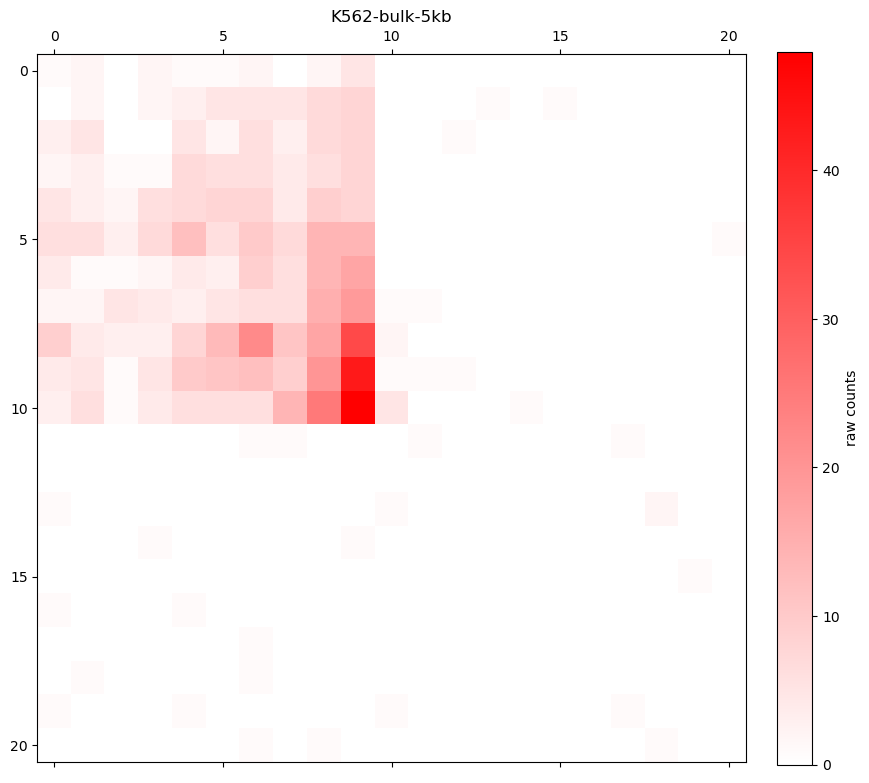

In [403]:
# heatmap_matrix(K562_sc_clr,submatrix,"chr9","K562-AGTACGCGCGTTACTT-100kb-impute")
heatmap_matrix(K562_bulk_clr,submatrix,"chr13","K562-bulk-5kb")

In [21]:
impute_matrix = imputation_rwr(K562_clr,chrom,resolution_rwr,logscale,pad,std,rp,tol,window_size
                    ,step_size,output_dist,min_cutoff,n_iters)
                    

In [25]:
# impute_matrix中多少非零值
print(np.count_nonzero(poor_matrix))
print(np.count_nonzero(impute_matrix))

1896
757134


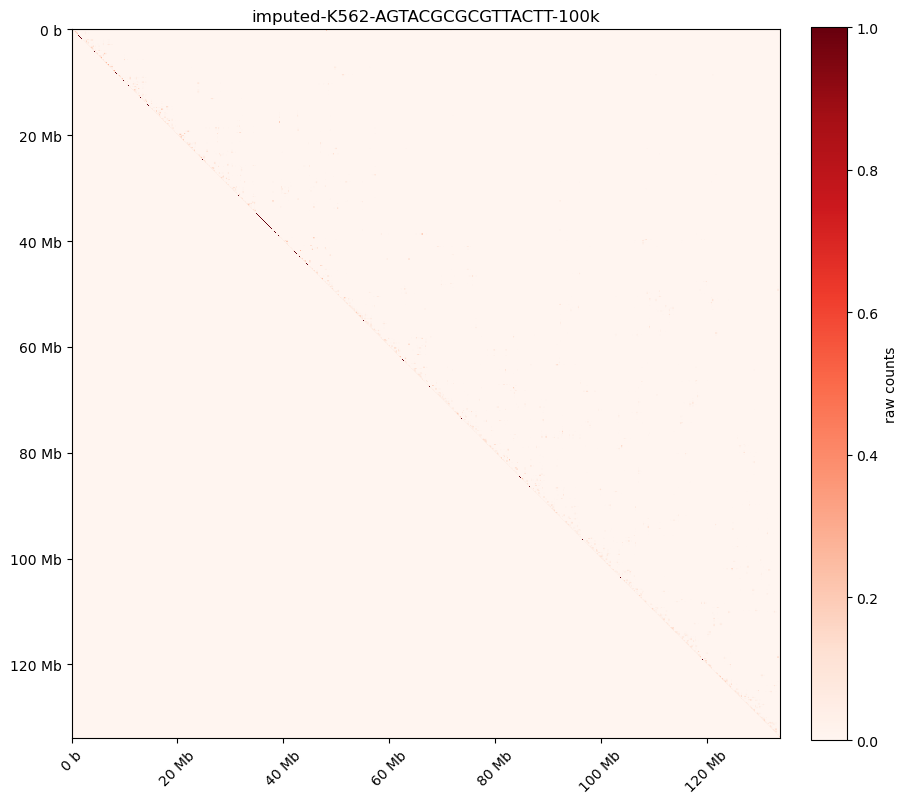

In [26]:
#画图
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(
    impute_matrix,
    vmax=1,
    extent=(0,K562_clr.chromsizes[chrom], K562_clr.chromsizes[chrom], 0),
    cmap="Reds")

plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title("imputed-K562-AGTACGCGCGTTACTT-100k")
format_ticks(ax)
plt.show()

In [4]:
label = np.load('input_data/label_imputation_binary.npy')
data = np.load('input_data/data_imputation.npy')

In [15]:
data = data.reshape(data.shape[0],21,21)

In [20]:
pos_data = data[label==1]
pos_label = label[label==1].astype(str)

neg_data = data[label==0]
neg_label = label[label==0].astype(str)

In [36]:
# random_plot(10,pos_data,pos_label)
# random_plot(10,neg_data,neg_label)

In [37]:
poor_label = np.load("input_data/label.npy")
poor_data = np.load("input_data/data.npy")

In [39]:
poor_data = poor_data.reshape(poor_data.shape[0],21,21)

In [46]:
poor_pos_data = poor_data[poor_label!=0]
poor_pos_label = poor_label[poor_label!=0].astype(str)

poor_neg_data = poor_data[poor_label==0]
poor_neg_label = poor_label[poor_label==0].astype(str)

[1869, 2014, 334, 1917, 892, 1875, 1056, 1793, 799, 581]
0
1
2
3
4
5
6
7
8
9


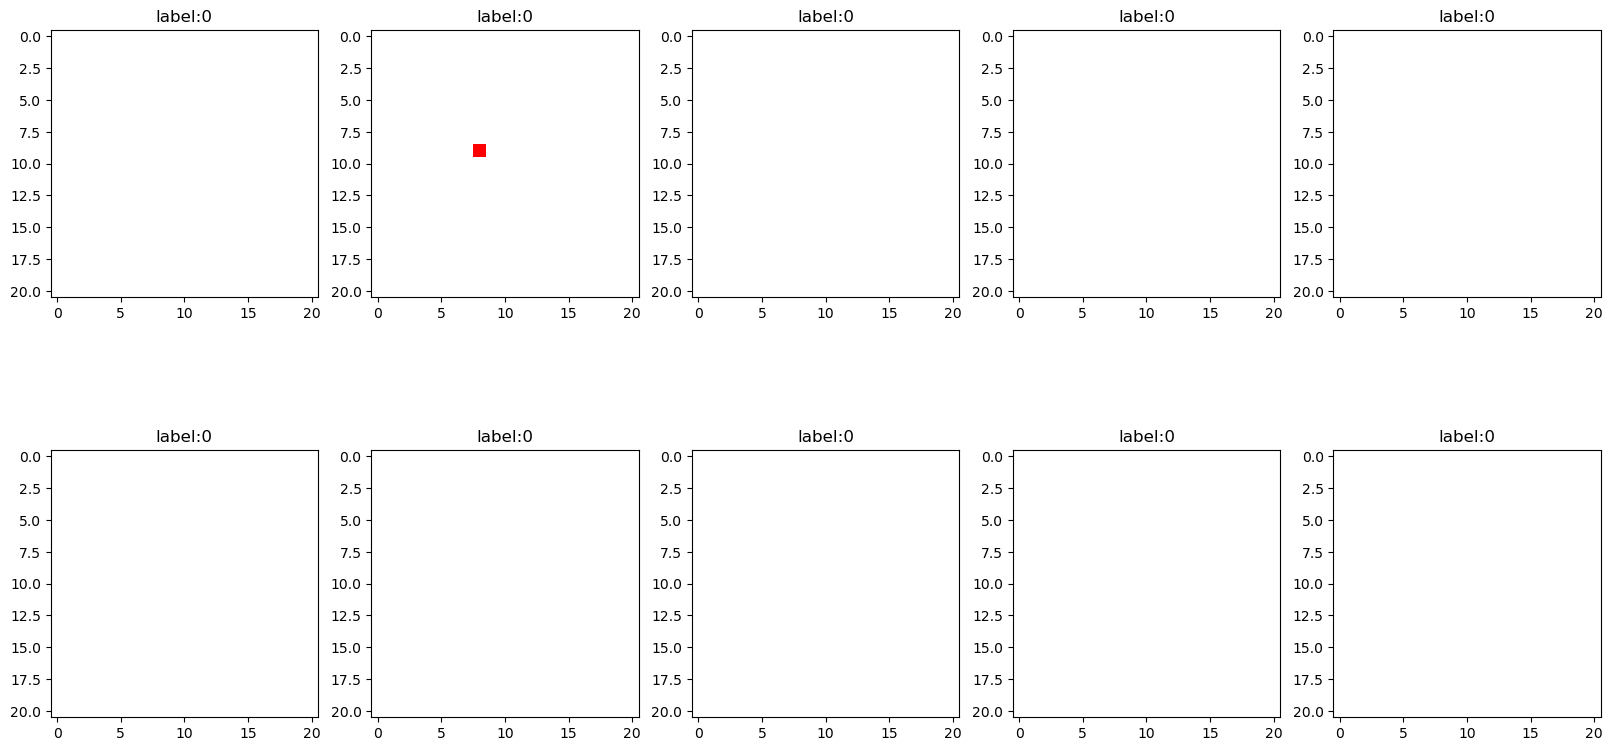

In [48]:


random_plot(10,poor_neg_data,poor_neg_label)